In [1]:
# import PyBEAM's default module
import pybeam.default as pbd
import numpy as np


In [2]:
# define model
model = {'type' : 'base',        # model type ('base' or 'ugm')
        'sigma' : 1.0,           # sets sigsma, the noise parameter
    'threshold' : 'exponential', # sets threshold type (fixed, linear, exponential, or weibull)
      'leakage' : False,         # if True, drift rate has leaky integration
        'delay' : True,          # if True, decision threshold motion is delayed (only for non-fixed thresholds)
'contamination' : False}         # if True, uniform contamination added to model

# outputs which keys your model uses for phi
pbd.parse_model(model)


['t_nd', 'w', 'mu', 'a', 'd', 'tau']

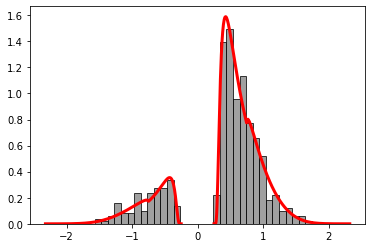

In [3]:
# parameters for synthetic data
phi = {'t_nd' : 0.25,          # non-decision time
          'w' : 0.5,           # relative start point
         'mu' : 1.0,           # drift rate
          'a' : 0.75,          # decision threshold location at t = 0
        'tau' : np.log10(1.5), # log base 10 of parameter (samples from logspace)
          'd' : 0.5}           # delay in decision threshold motion

# generate synthetic data
rt = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                         model = model, # dictionary containing model information
                           phi = phi)   # parameters used to simulate data

# plot synthetic data and model rt distributions
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi,   # parameters used for model rt distribution
               rt = rt);   # dictionary of simulated rt data


In [4]:
# define model priors
p = {'pt_nd' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # non-decision time prior
        'pw' : 'Uniform("w", lower = 0.3, upper = 0.7)', # relative start point prior
       'pmu' : 'Uniform("mu", lower = -5.0, upper = 5.0)', # drift rate prior
        'pa' : 'Uniform("a", lower = 0.25, upper = 2.0)', # decision threshold prior
      'ptau' : 'Uniform("tau", lower = -1.0, upper = 1.0)', # decision threshold prior
        'pd' : 'Uniform("d", lower = 0.0, upper = 2.0)'} # decision threshold prior

# define model condition
c = {'rt' : rt,      # dictionary containing reaction time data
   't_nd' : 'pt_nd', # prior for non-decision time, references p['pt_nd']
      'w' : 'pw',    # prior for relative start point, references p['pw']
     'mu' : 'pmu',   # prior for the drift rate, references p['pmu']
      'a' : 'pa',
    'tau' : 'ptau',
      'd' : 'pd'}    

# load conditions into dictionary
cond = {0 : c}

# run parameter inference
trace = pbd.inference(model = model,
                     priors = p,
                 conditions = cond,
                    samples = 50000,
                     chains = 3,
                      cores = 3,
                  file_name = 'exponential_delay')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [d, tau, a, mu, w, t_nd]


Sampling 3 chains for 0 tune and 50_000 draw iterations (0 + 150_000 draws total) took 72 seconds.


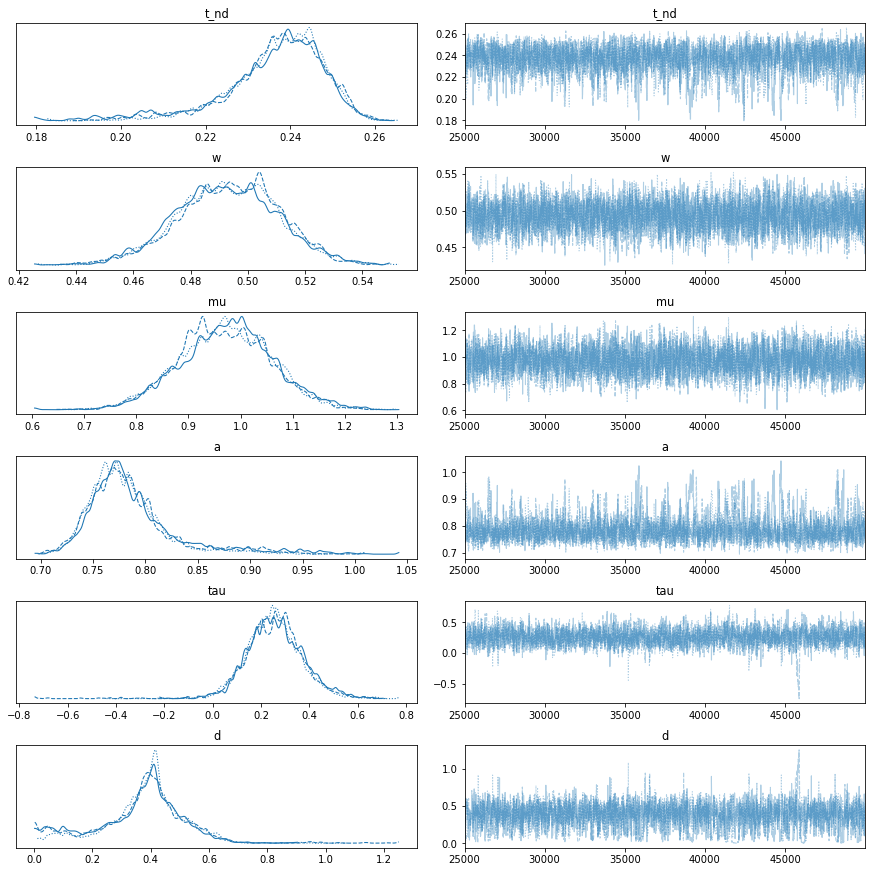

In [37]:
# plot posteriors
pbd.plot_trace(file_name = 'exponential_delay', burnin = 25000);


In [36]:
# summary of posteriors
pbd.summary(file_name = 'exponential_delay', burnin = 25000)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t_nd,0.237,0.011,0.214,0.255,0.000,0.000,1391.0,937.0,1.00
w,0.493,0.018,0.459,0.526,0.000,0.000,2551.0,4122.0,1.00
mu,0.972,0.088,0.802,1.134,0.002,0.001,2588.0,4505.0,1.00
a,0.785,0.043,0.719,0.874,0.002,0.001,1206.0,788.0,1.00
tau,0.255,0.119,0.050,0.482,0.003,0.002,1857.0,2697.0,1.00
d,0.369,0.147,0.036,0.596,0.005,0.003,975.0,622.0,1.01
